# **Business Problem Understanding**

**Context**
 
Platform penjualan mobil bekas sudah menjadi hal yang umum pada era ini. Karena dengan platform inilah (sebagai third party) interaksi yang terjadi antara penjual dan calon pembeli menjadi mudah. Penjualan mobil bekas memang menguntungkan bagi kedua belah pihak. Di satu sisi, penjual mobil bekas beranggapan bahwa mobil yang dia punya sudah ada manfaatnya lagi bagi dia dan lebih baik dijual untuk mendatangkan keuntungan. Di sisi lain, pembeli mobil bekas sedang membutuhkan mobil dengan harga yang terjangkau. 

Model bisnis platform penjualan mobil umumnya memberikan kebebasan bagi penjual untuk menentukan harga mobil. Namun perlu diingat bahwa harga mobil bekas yang terlalu tinggi dibanding mobil dengan fitur yang sama, tentu membuat pembeli berpikir dua kali untuk membelinya (kehilangan calon pembeli itu berarti kehilangan profit). Sebaliknya, jika terlalu murah, tentu penjual tidak akan mendapatkan profit yang sepadan.

**Problem Statement**

Tantangan bagi perusahaan platform penjualan mobil bekas adalah memecahkan masalah untuk dapat memiliki model bisnis yang menguntungkan bagi penjual, serta dapat memberikan pengalaman positif bagi pembeli. Mengingat platform ini menawarkan kebebasan penuh kepada penjual untuk menentukan harga mobil bekas-nya, namun akan sulit bagi penjual untuk menentukan harga yang kompetitif. Sehingga setidaknya dibutuhkan petunjuk harga bagi penjual melalui platform jual beli ini.  

**Goals**

Berdasarkan permasalahan tersebut, platform penjualan mobil bekas di Saudi Arabia tentu perlu memiliki "model" yang dapat memprediksi serta membantu klien mereka (dalam hal ini penjual mobil bekas) untuk dapat menentukan harga mobil yang tepat. Adanya perbedaan pada berbagai fitur yang terdapat pada mobil, seperti tahun pembuatan, jarak yang sudah ditempuh mobil bekas, ukuran mesin, dan sebagainya dapat menambah keakuratan prediksi harga mobil bekas, yang mana dapat mendatangkan keuntungan bagi penjual dan juga tentunya masih terjangkau bagi pembeli.

**Analytic Approach**

Penganalisan data perlu dilakukan untuk dapat menemukan pola dari fitur-fitur yang ada. Kemudian, proses dilanjutkan dengan membuat suatu model regresi untuk memprediksi harga penjualan mobil bekas pada data yang baru masuk kedalam daftar/list penjualan mobil bekas, di mana hal ini bertujuan untuk mempermudah penjual dalam menentukan harga mobil bekas-nya.

**Metric Evaluation**

RMSE, MAE, dan MAPE akan digunakan sebagai evaluasi metrik keakuratan suatu model, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. Namun, nilai R-squared atau adj. R-squared ini tidak akan digunakan dalam evaluasi metrik untuk dataset ini dikarenakan model yang digunakan merupakan model non-linear.

## 1 Initial Preparation

### 1.1 Load Libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import normaltest

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

import pickle
pd.set_option("display.max_columns", None)

### 1.2 Load and Overview Dataset

In [90]:
df=pd.read_csv("data_saudi_used_cars.csv")
df_ori=pd.read_csv("data_saudi_used_cars.csv")
df_ori.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


### 1.3 Feature/Column Description

Deskripsi untuk masing masing feature:
- Type: Nama produk mobil bekas
- Region: Daerah/region dimana mobil bekas dijual
- Make: Brand Mobil bekas
- Gear_Type	: Tipe gear dari mobil bekas
- Origin: Daerah dimana mobil bekas tersebut berasal
- Options: Pilihan mobil bekas
- Year: Tahun pembuatan mobil 
- Engine_Size: Ukuran mesin dari mobil bekas
- Mileage: Jarak yang sudah ditempuh dari mobil bekas tersebut
- Negotiable: Apakah harga dari mobil bekas bisa dinego
- Price: Harga mobil bekas

### 1.4 Dataset Information

**Data Overview**

In [91]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [92]:
pd.set_option("display.max_colwidth", -1)
listItem = []
for col in df_ori.columns :
    listItem.append( [col, df_ori[col].nunique(), df_ori[col].unique()])
df_desk = pd.DataFrame(columns=["Column Name","Number of Unique","Unique Sample"],data=listItem)
df_desk

,Column Name,Number of Unique,Unique Sample
0,Type,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,2,"[Manual, Automatic]"
4,Origin,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,3,"[Standard, Full, Semi Full]"
6,Year,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
7,Engine_Size,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
8,Mileage,1716,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
9,Negotiable,2,"[True, False]"


In [93]:
df_ori.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


In [94]:
df_ori.describe(include="object")

,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


Dari penjabaran singkat diatas dapat diketahui bahwa:
- Terdapat 11 fitur (kolom) yang membentuk Boston crime dataset dengan banyak data (baris) yaitu 5624 data
- Jenis data setiap fitur (kolom) terbagi menjadi empat jenis data yaitu Object(6 fitur), int64(3 fitur), float64(1 fitur), dan bool(1 fitur)
- Tidak ada missing value di setiap fitur

## 2 EDA and Data Cleaning

### 2.1 Negotiable Column

,Presentase dari Total Data
False,68.065434
True,31.934566


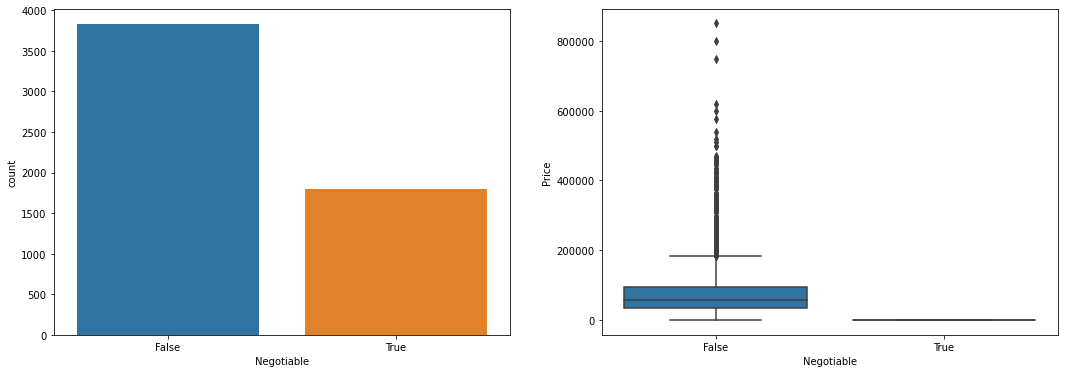

In [95]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(data=df_ori,x="Negotiable")
plt.subplot(1,2,2)
sns.boxplot(data=df_ori,x="Negotiable",y="Price")
;

pd.DataFrame(df_ori["Negotiable"].value_counts().rename("Presentase dari Total Data")/len(df_ori)*100)

In [96]:
df=df[df["Negotiable"]!=True]
df.drop(columns="Negotiable",inplace=True)
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


**Summary**
- Dari grafik countplot kolom "Negotiable" diketahui bahwa kebanyakan mobil bekas yang dijual di Saudi Arabia sudah ditetapkan harganya (sekitar 68%).
- Dari grafik boxplot kolom "Negotiable" dengan "Price" diketahui bahwa untuk mobil bekas yang dapat ditawar (negotiable) memiliki harga yaitu 0. Hal ini dikarenakan mobil bekas yang dapat ditawar (negotable) tidak memiliki harga yang pasti. 
- Dikarenakan mobil bekas yang dapat ditawar ini tidak tentu harganya dan sulit untuk diprediksi (akan mempengaruhi pemodelan) maka ada baiknya mobil-mobil bekas yang dapat ditawar akan didrop. Hal ini juga akan berlanjutkan dengan menghapus kolom "Negotiable" karena model sudah dikercutkan hanya berfokus pada mobil-mobil bekas yang sudah memiliki harga pasti.

### 2.2 Type Column

**EDA Original Data**

In [97]:
print("Jumlah Unique Item pada Kolom 'Type':",len(df_ori["Type"].value_counts()))

Jumlah Unique Item pada Kolom 'Type': 347


In [98]:
pd.DataFrame(df_ori["Type"].value_counts()[0:6:1].rename("Quantity of Top 5 Car Type"))

,Quantity of Top 5 Car Type
Land Cruiser,269
Camry,234
Hilux,207
Accent,174
Yukon,162
Sonata,157


In [99]:
pd.DataFrame(df_ori["Type"].value_counts()[-1:-6:-1].rename("Quantity of Bottom 5 Car Type"))

,Quantity of Bottom 5 Car Type
S8,1
CT5,1
GC7,1
360,1
Nativa,1


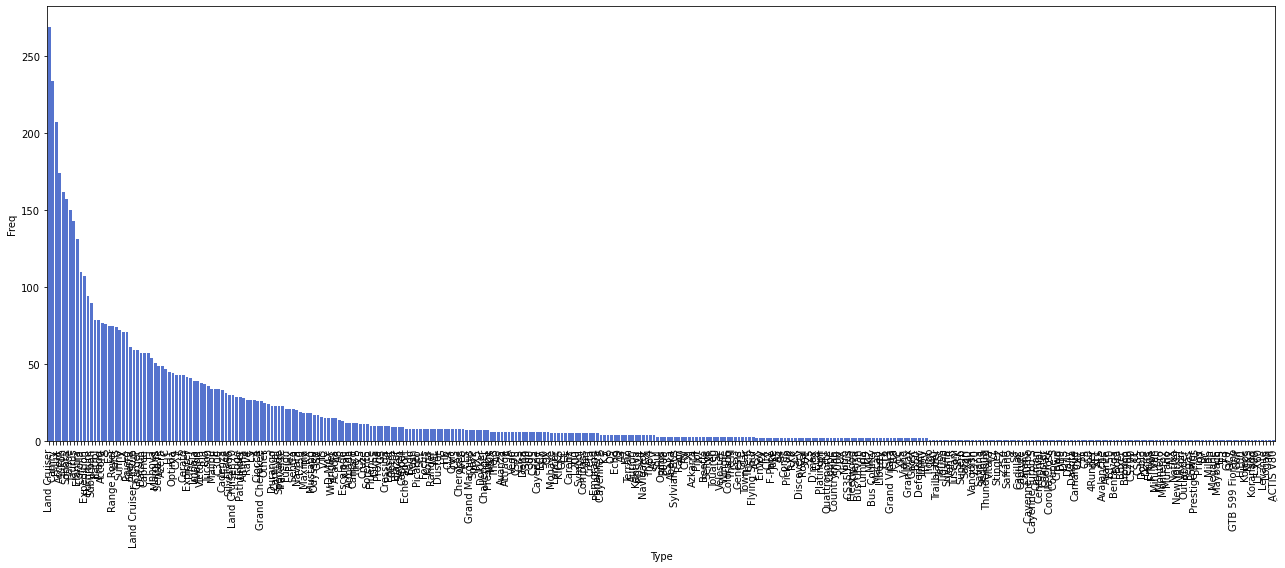

In [100]:
plt.figure(figsize=(22,8))
sns.barplot(data=df_ori.groupby("Type").count()[["Price"]].sort_values("Price",ascending=False).reset_index().rename(columns={"Price":"Freq"}),y="Freq",x="Type",color="royalblue")
plt.xticks(rotation=90);

**Anomalie Treatment**

In [101]:
for i in list(df["Type"].value_counts()[df["Type"].value_counts()<2].index):
    df=df[df["Type"]!=i]

**Summary**
- Total tipe mobil bekas yang dijual di Saudi Arabia berjumlah 347
- Dari tabel Quantity of Top 5 Car Type dan grafik dapat disimpulkan bahwa penduduk Saudi Arabia cenderung memnjual mobil bekas bertipe Land Cruiser, Hilux, dan Accent	
- Dari tabel Quantity of Bottom 5 Car Type, dapat diketahui bahwa terdapat beberapa unique item yang hanya berjumlah satu atau sedikit. Hal ini dapat menimbulkan kesalahan atau error selama proses pemodelan khususnya dibagian splitting data train dan data test. Ketika unique item yang berjumlah satu atau sedikit hanya masuk kedalam test set maka model tidak mampu meprediksi, karena pada saat proses train data, item tersebut tidak dipelajari oleh model. Maka dari itu untuk mencegah hal tersebut terjadi maka ada baiknya untuk mendrop unque item yang berjumlah satu atau sedikit.
- Selain itu juga beberapa tipe mobil yang memiliki jumlah sedikit memang sangat beresiko tereliminasi ketika melakukan data cleaning

### 2.3 Make Column

**EDA Original Data**

In [102]:
print("Jumlah Unique Item pada Kolom 'Make':",len(df_ori["Make"].value_counts()))

Jumlah Unique Item pada Kolom 'Make': 58


In [103]:
pd.DataFrame(df_ori["Make"].value_counts()[0:6:1].rename("Quantity of Top 5 Make"))

,Quantity of Top 5 Make
Toyota,1431
Hyundai,670
Ford,530
Chevrolet,458
Nissan,387
GMC,282


In [104]:
pd.DataFrame(df_ori["Make"].value_counts()[-1:-6:-1].rename("Quantity of Bottom 5 Make"))

,Quantity of Bottom 5 Make
Ferrari,1
Tata,1
SsangYong,1
Iveco,1
BYD,1


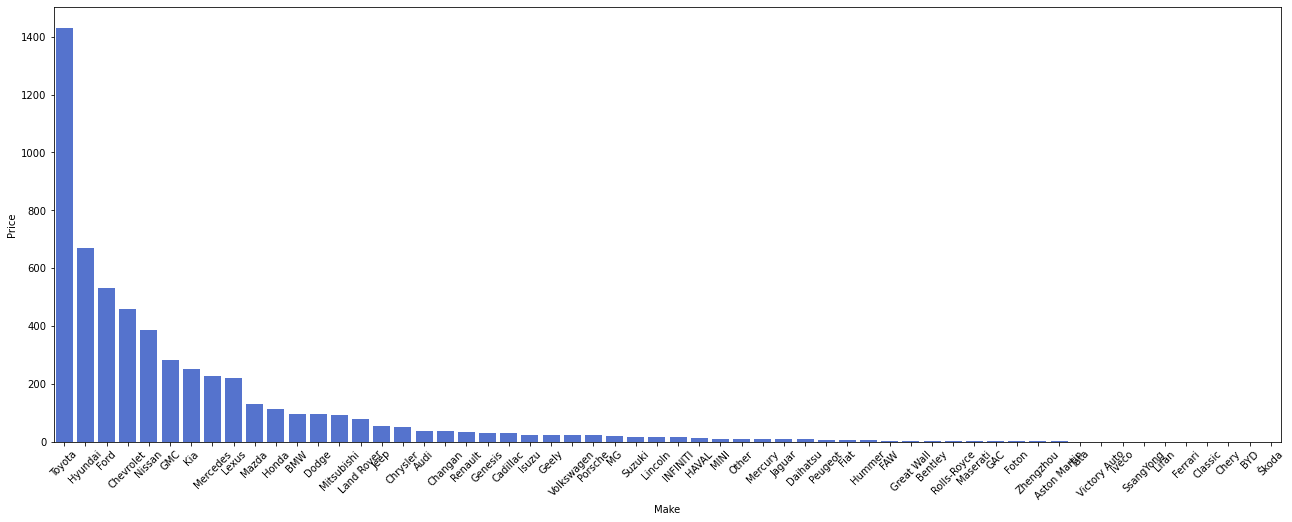

In [105]:
plt.figure(figsize=(22,8))
sns.barplot(data=df_ori.groupby("Make").count()[["Price"]].sort_values("Price",ascending=False).reset_index(),y="Price",x="Make",color="royalblue")
plt.xticks(rotation=45);

**Anomalie Treatment**

In [106]:
for i in list(df["Make"].value_counts()[df["Make"].value_counts()<2].index):
    df=df[df["Make"]!=i]

**Summary**
- Total brand mobil bekas yang dijual di Saudi Arabia berjumlah 58
- Dari tabel Quantity of Top 5 Car Type dan grafik dapat disimpulkan bahwa penduduk Saudi Arabia cenderung memnjual mobil bekas yang memiliki brand yaitu Toyota, Hyundai, dan Ford
- Dari tabel Quantity of Bottom 5 Car Type, dapat diketahui bahwa terdapat beberapa unique item yang hanya berjumlah satu atau sedikit. Maka unique item ini akan dihapus agar tidak membuat model error selama proses splitting dan modelling
- Beberapa brand mobil yang memiliki jumlah sedikit memang sangat beresiko tereliminasi ketika melakukan data cleaning

### 2.4 Region Column

**EDA Originial Data**

In [107]:
print("Jumlah Unique Item pada Kolom 'Region':",len(df_ori["Region"].value_counts()))

Jumlah Unique Item pada Kolom 'Region': 27


In [108]:
pd.DataFrame(df_ori["Region"].value_counts()[0:6:1].rename("Quantity of Top 5 Region"))

,Quantity of Top 5 Region
Riyadh,2272
Dammam,925
Jeddah,733
Qassim,225
Al-Medina,214
Al-Ahsa,166


In [109]:
pd.DataFrame(df_ori["Region"].value_counts()[-1:-6:-1].rename("Quantity of Bottom 5 Region"))

,Quantity of Bottom 5 Region
Sabya,4
Sakaka,10
Wadi Dawasir,12
Al-Namas,12
Qurayyat,13


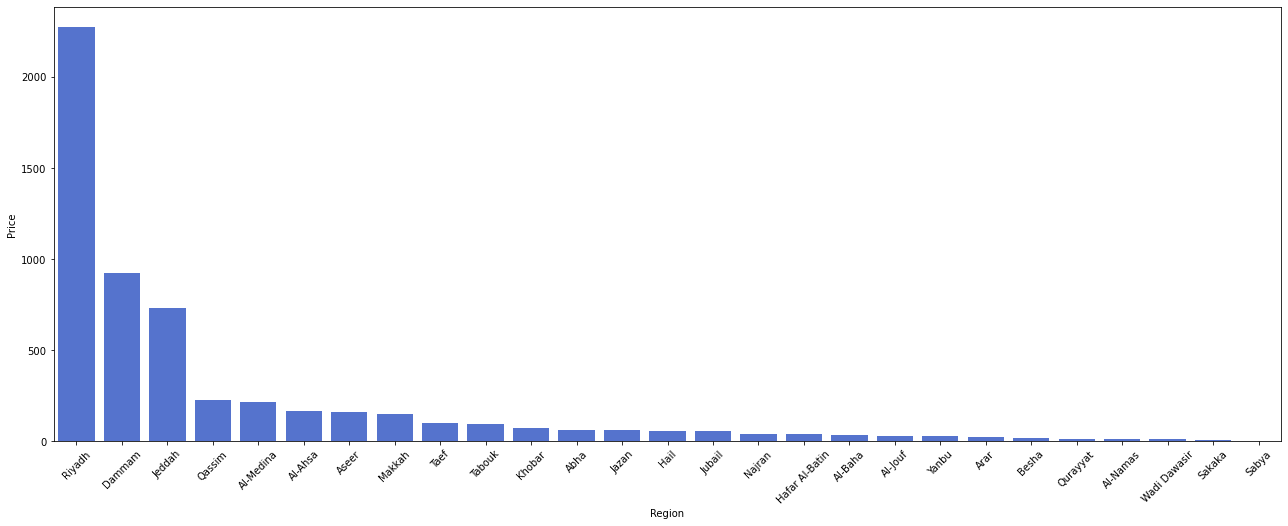

In [110]:
plt.figure(figsize=(22,8))
sns.barplot(data=df_ori.groupby("Region").count()[["Price"]].sort_values("Price",ascending=False).reset_index(),y="Price",x="Region",color="royalblue")
plt.xticks(rotation=45);

**Anomalie Treatment**

In [111]:
for i in list(df["Region"].value_counts()[df["Region"].value_counts()<2].index):
    df=df[df["Region"]!=i]

**Summary**
- Total region dimana mobil bekas dijual berjumlah 27
- Dari tabel Quantity of Top 5 Car Region dan grafik dapat disimpulkan bahwa mobil bekas dijual di daerah Riyadh, Dammam, dan Jedah	
- Dari tabel Quantity of Bottom 5 Car Region, dapat diketahui bahwa terdapat beberapa unique item yang hanya berjumlah satu atau sedikit. Maka unique item ini akan dihapus agar tidak membuat model error selama proses splitting dan modelling
- Beberapa Region yang memiliki jumlah sedikit memang sangat beresiko tereliminasi ketika melakukan data cleaning

### 2.5 Origin Column

**EDA Original Data**

,Presentase dari Total Data
Saudi,74.466572
Gulf Arabic,12.393314
Other,12.055477
Unknown,1.084637


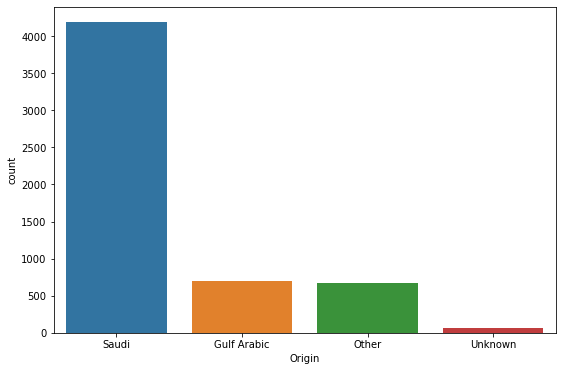

In [112]:
plt.figure(figsize=(9,6))
sns.countplot(data=df_ori,x="Origin")
;

pd.DataFrame(df_ori["Origin"].value_counts().rename("Presentase dari Total Data")/len(df_ori)*100)

**Anomalie Treatment**

In [113]:
df["Origin"]=np.where(df["Origin"]=="Unknown",df["Origin"].mode(),df["Origin"])

**Summary**

- Total Origin dimana mobil bekas yang dijual berasal berjumlah empat yaitu Saudi, Gulf Arabic, Other, dan Unknown. Namun, Disini saya beranggapan bahwa Unknown merupakan missing data maka akan diimpute dengan modus di kolom ini. Sehingga total region hanya akan tersisa 3 Region
- Dari grafik dapat disimpulkan bahwa mobil bekas yang dijual kebanyakan berasal dari Saudi	(daerah perkotaan saudi Arabia) yaitu sebesar 74% dari total mobil bekas.

### 2.6 Gear_Type Column

**EDA Original Data**

,Gear_Type
Automatic,86.682077
Manual,13.317923


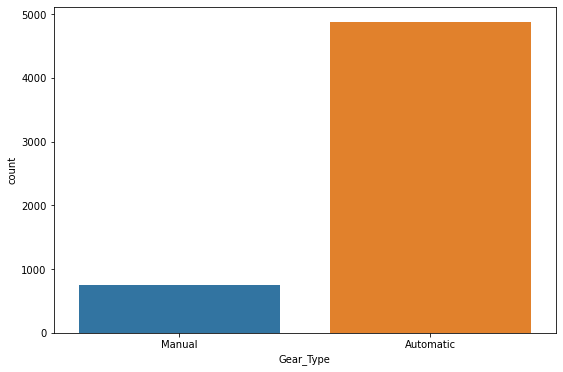

In [114]:
plt.figure(figsize=(9,6))
sns.countplot(data=df_ori,x="Gear_Type")
;

pd.DataFrame(df_ori["Gear_Type"].value_counts().rename("Gear_Type")/len(df_ori)*100)

**Summary**

- Terdapat dua gear type pada mobil bekas yang dijual di Saudi Arabia yaitu Automatic dan Manual.
- Dari grafik dapat disimpulkan bahwa mobil bekas yang dijual kebanyakan memilki gear type yang automatic yaitu sebesar 86.6% dari total mobil bekas.

### 2.7 Options Column

**EDA Original Data**

,Options
Full,39.704836
Standard,32.396871
Semi Full,27.898293


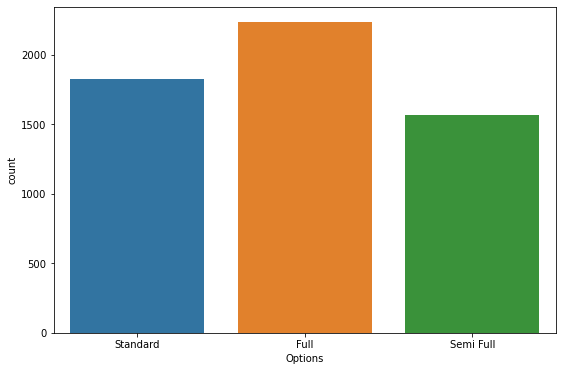

In [115]:
plt.figure(figsize=(9,6))
sns.countplot(data=df_ori,x="Options")
;

pd.DataFrame(df_ori["Options"].value_counts().rename("Options")/len(df_ori)*100)

**Summary**

- Terdapat tiga options pada mobil bekas yang dijual di Saudi Arabia yaitu Full, Semi Full, dan Standard.
- Dari grafik dapat disimpulkan bahwa mobil bekas yang dijual kebanyakan memilki option yaitu Full, sebesar 39.7% dari total mobil bekas.

### 2.8 Year Column

**EDA Original Data**

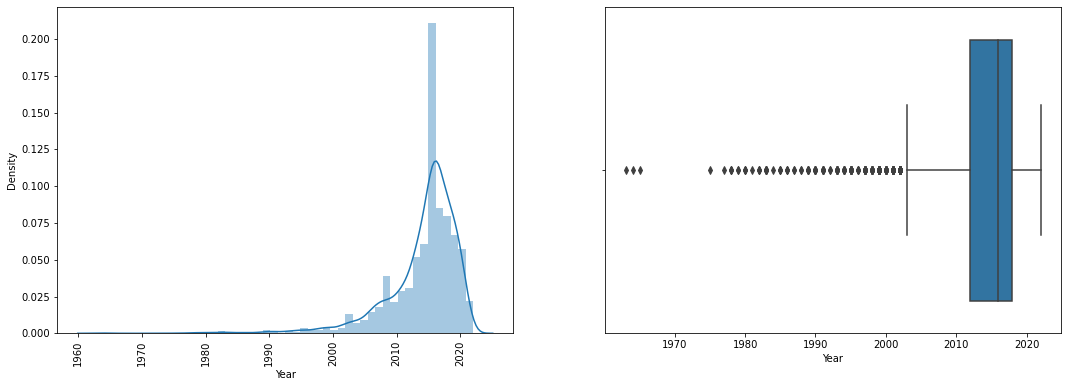

In [116]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df_ori["Year"])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(data=df_ori,x="Year");

In [117]:
normaltest(df_ori["Engine_Size"])

NormaltestResult(statistic=404.9051034541338, pvalue=1.191170522955096e-88)

In [118]:
df_ori["Year"].describe()

count    5624.000000
mean     2014.101885
std      5.791606   
min      1963.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2022.000000
Name: Year, dtype: float64

**Summary**

- Dari grafik histogram dan boxplot diatas, dapat diketahui bahwa distribusi mobil bekas berdasarkan tahun berbentuk left skewed. Hal ini juga terbukti dari nilai p-value (hasil normality test) yang dibawah 0.05
- Dari grafik ini juga dapat disimpulkan bahwa mobil bekas yang dijual kebanyakan (median) merupakan mobil dengan kisaran tahun pembuatan yaitu 2016.


### 2.9 Engine_Size Column

**EDA Original Data**

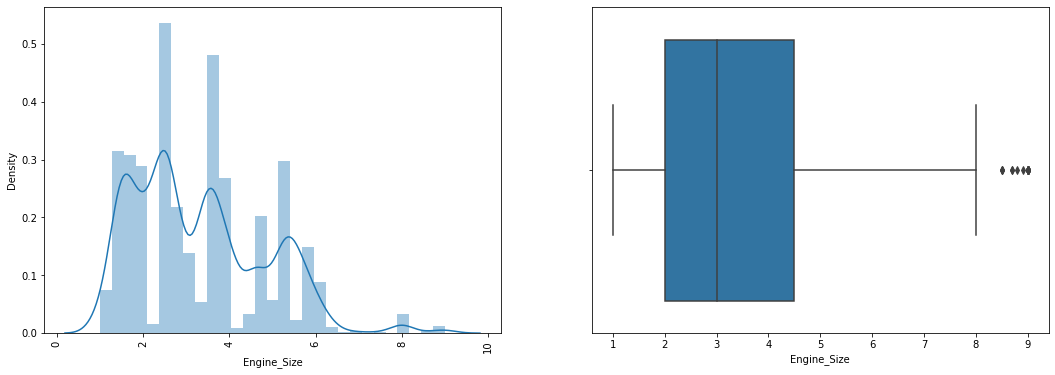

In [119]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df_ori["Engine_Size"])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(data=df_ori,x="Engine_Size");

In [120]:
normaltest(df_ori["Year"])

NormaltestResult(statistic=2962.6395681348195, pvalue=0.0)

In [121]:
df_ori["Engine_Size"].describe()

count    5624.000000
mean     3.295430   
std      1.515108   
min      1.000000   
25%      2.000000   
50%      3.000000   
75%      4.500000   
max      9.000000   
Name: Engine_Size, dtype: float64

**Summary**

- Dari grafik histogram dan boxplot diatas, dapat diketahui bahwa distribusi ukuran mesin mobil bekas berbentuk cenderung right skewed. Hal ini juga terbukti dari nilai p-value (hasil normality test) yang dibawah 0.05
- Dari grafik ini juga dapat disimpulkan bahwa mobil bekas yang dijual kebanyakan (median) merupakan mobil dengan ukuran mesin yaitu 3.

### 2.10 Mileage Column

**EDA Original Data**

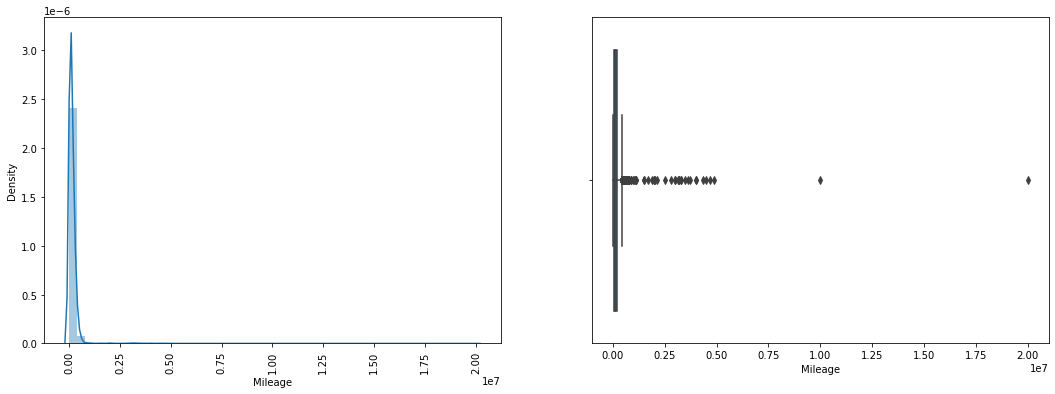

In [122]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df_ori["Mileage"])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(data=df_ori,x="Mileage");

In [123]:
normaltest(df_ori["Mileage"])

NormaltestResult(statistic=14798.94292519718, pvalue=0.0)

In [124]:
df_ori["Mileage"].describe()

count    5.624000e+03
mean     1.509234e+05
std      3.828360e+05
min      1.000000e+02
25%      3.800000e+04
50%      1.030000e+05
75%      1.960000e+05
max      2.000000e+07
Name: Mileage, dtype: float64

**Anomalie Treatment**

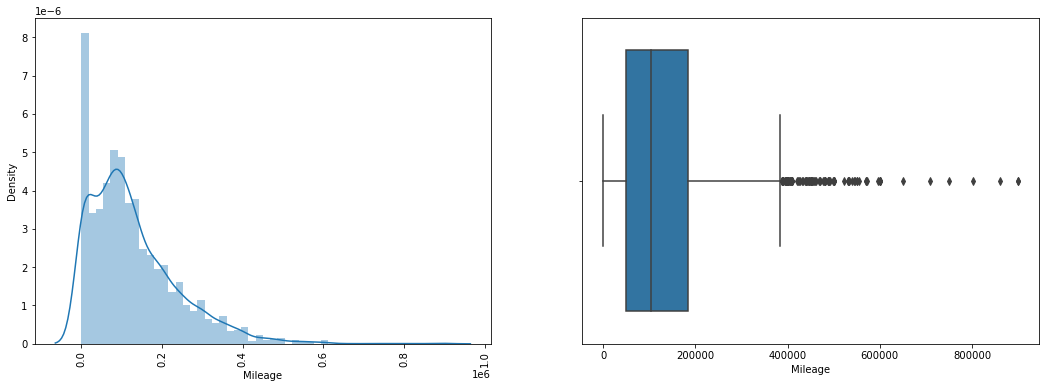

In [125]:
df=df[df["Mileage"]<1000000]

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df["Mileage"])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(data=df,x="Mileage");

In [126]:
normaltest(df["Mileage"])

NormaltestResult(statistic=1074.1244848238928, pvalue=5.712571934766275e-234)

In [127]:
df["Mileage"].describe()

count    3715.000000  
mean     128837.514401
std      111069.893101
min      100.000000   
25%      49000.000000 
50%      103358.000000
75%      183000.000000
max      900000.000000
Name: Mileage, dtype: float64

**Summary**

- Sebelum dilakukan elminiasi outlier, dari grafik histogram dan boxplot diatas, dapat diketahui bahwa distribusi jarak yang sudah ditempuh mobil bekas berbentuk right skewed. Hal ini juga terbukti dari nilai p-value (hasil normality test) yang dibawah 0.05
- Sebelum dilakukan elminiasi outlier, dari grafik ini juga dapat disimpulkan bahwa mobil bekas yang dijual kebanyakan (median) merupakan mobil yang sudah menempuh jarak sebesar 103000.
- Apabila dilihat pada boxplot, terdapat satu yang data nilai mileage sangat tinggi dan mungkin nilainya bisa dianggap tidak masuk akal (apabila satuan milaege ini dalam km, maka jarak tempuh mobil 1000000 km - 20000000 km rasanya kurang tepat). Maka dari itu diputuskan untuk mendrop data tersebut.

### 2.11 Price Column (Target)

**EDA Original Data**

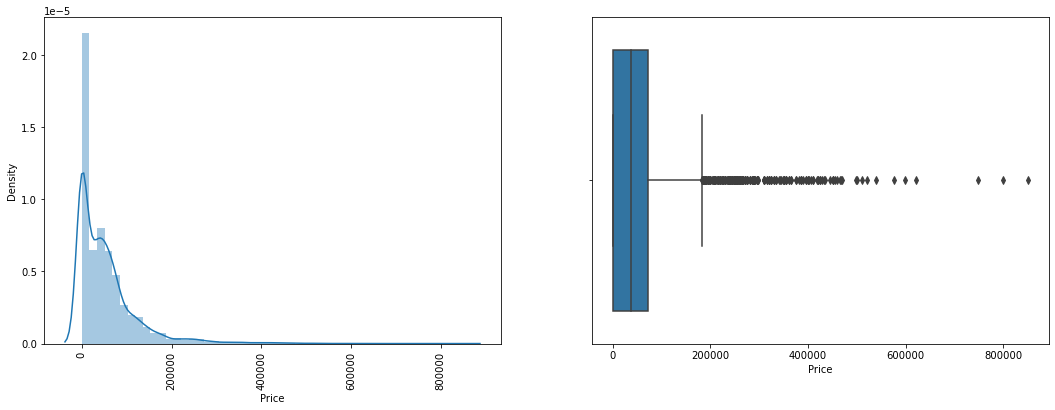

In [128]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df_ori["Price"])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(data=df_ori,x="Price");

In [129]:
normaltest(df_ori["Price"])

NormaltestResult(statistic=3799.9262918897903, pvalue=0.0)

In [130]:
df_ori["Price"].describe()

count    5624.000000  
mean     53074.058144 
std      70155.340614 
min      0.000000     
25%      0.000000     
50%      36500.000000 
75%      72932.500000 
max      850000.000000
Name: Price, dtype: float64

**Anomalie Treatment**

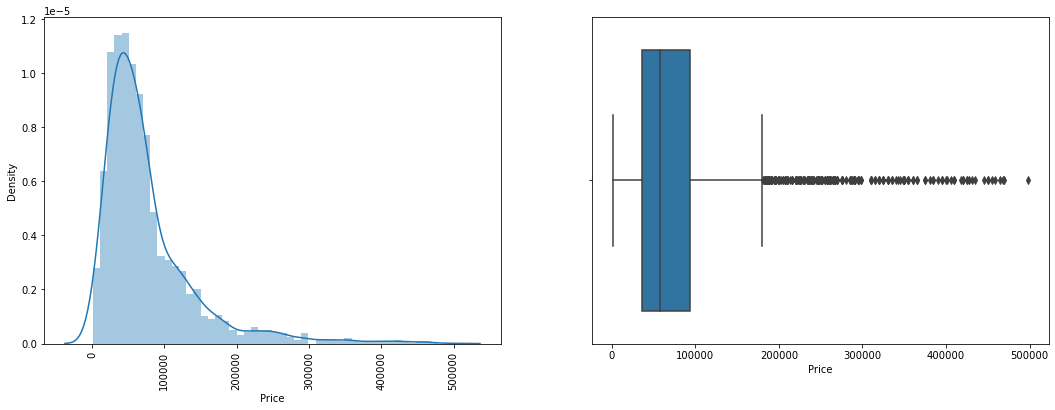

In [131]:
df=df[(df["Price"]<500000)&(df["Price"]>1000)]

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df["Price"])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(data=df,x="Price");

In [132]:
normaltest(df["Price"])

NormaltestResult(statistic=1890.7293581138692, pvalue=0.0)

In [133]:
df["Price"].describe()

count    3698.000000  
mean     76833.251758 
std      66261.130433 
min      1002.000000  
25%      35500.000000 
50%      58000.000000 
75%      93500.000000 
max      498000.000000
Name: Price, dtype: float64

**Summary**

- Sebelum dilakukan elminiasi outlier, dari grafik histogram dan boxplot diatas, dapat diketahui bahwa distribusi harga mobil bekas berbentuk right skewed. Hal ini juga terbukti dari nilai p-value (hasil normality test) yang dibawah 0.05
- sebelum dilakukan elminiasi outlier, dari grafik ini juga dapat disimpulkan bahwa mobil bekas yang dijual kebanyakan (median) merupakan mobil yang sudah memiliki harga yaitu UDF 36500.
- Apabila dilihat pada boxplot, terdapat beberapa harga mobil yang nilai jualnya sangat rendah dan sangat tinggi. Sehingga, mungkin nilainya bisa dianggap tidak masuk akal (apabila satuan price dalam dalam USD, maka harga mobil yang dibawah USD 1000 dan diatas USD 500000 kurang tepat). Maka dari itu diputuskan untuk mendrop data tersebut.

## 3 Data Correlation

**Correlation Between Numerical Feature and Target**

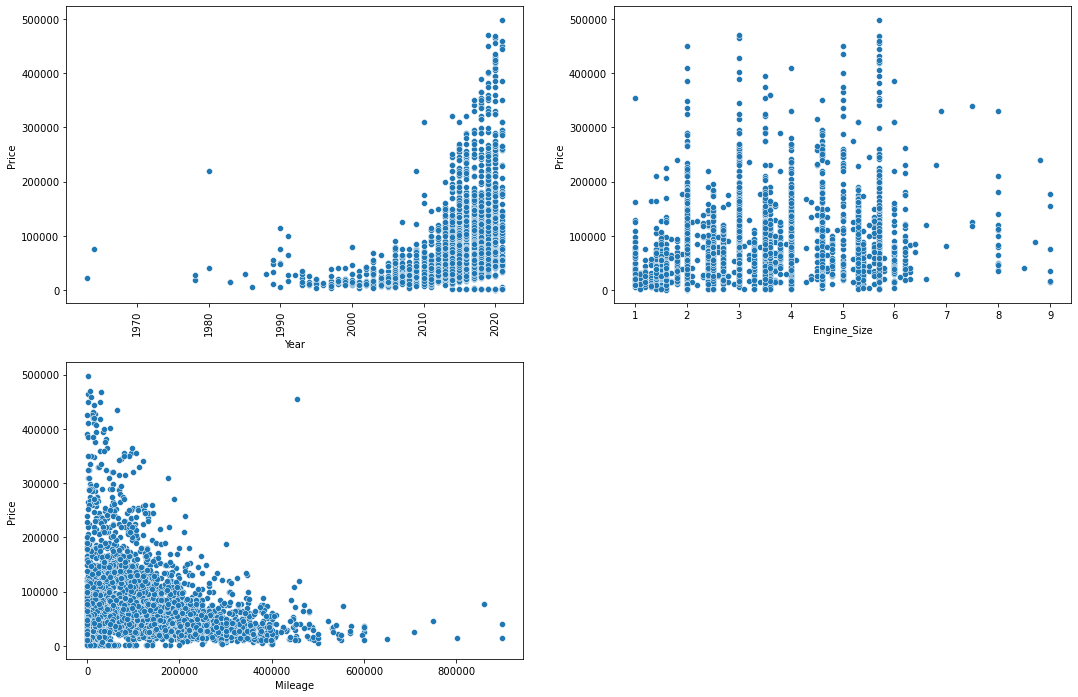

In [134]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.scatterplot(data=df,y="Price",x="Year")
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.scatterplot(data=df,y="Price",x="Engine_Size")
plt.subplot(2,2,3)
sns.scatterplot(data=df,y="Price",x="Mileage");

**Correlation Test Between Some Feature and Target**

In [135]:
df_correlation=pd.get_dummies(data=df,columns=["Gear_Type","Origin","Options"],drop_first=True).drop(columns=["Type","Region","Make"])
df_correlation["Price (Target)"]=df_correlation["Price"]
df_correlation.drop(columns="Price",inplace=True)
df_correlation

,Year,Engine_Size,Mileage,Gear_Type_Manual,Origin_Other,Origin_Saudi,Options_Semi Full,Options_Standard,Price (Target)
1,2014,8.0,80000,0,0,1,0,0,120000
2,2015,5.0,140000,0,0,0,0,0,260000
3,2015,2.4,220000,0,0,1,1,0,42000
5,2019,2.0,25000,0,0,1,1,0,58000
6,2012,4.8,189000,0,0,1,0,0,85000
...,...,...,...,...,...,...,...,...,...
5616,2020,2.0,9500,0,0,1,0,0,132000
5618,2006,5.3,86000,0,0,1,0,0,50000
5619,2018,2.5,78794,0,0,1,0,1,68000
5621,2016,5.3,48000,0,0,1,0,0,145000


''

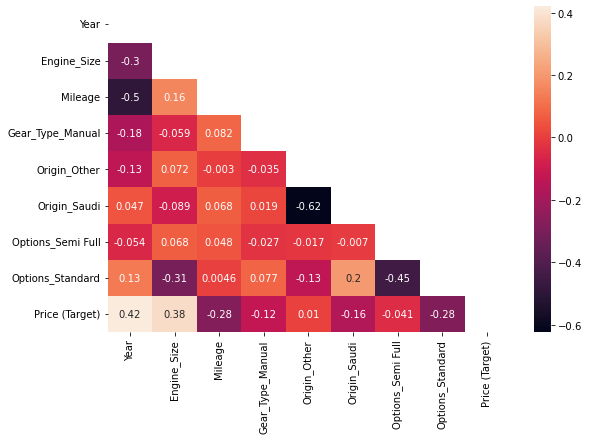

In [136]:
plt.figure(figsize=(9,6))
mask = np.triu(np.ones_like(df_correlation.corr("spearman")))

sns.heatmap(df_correlation.corr("spearman"), annot=True, mask=mask)
;

**Summary**
- Dikarenakan ada beberapa fitur yang apabila diencode akan menghasilkan banyak kolom maka untuk penilain korelasi fitur terhadap target hanya akan berfokus pada korelasi feature numerikal dengan target dan beberapa featrue kategorikal dengan target.
- Disini dapat dilihat bahwa feature "Year" memiliki korelasi positive yang moderate terhadap target. Artinya, disini apabila tahun pembuatan mobil naik maka harga cenderung naik. Harga mobil keluaran baru cenderung lebih mahal
- Disini juga dapat dilihat bahwa feature "Engine_Size" memiliki korelasi positive yang moderate terhadap target. Artinya, disini apabila ukuran mesin mobil naik maka harga cenderung naik. Mobil yang memiliki ukuran mesin lebih besar kemampuan dorong lebih baik, maka harga lebih mahal 
- Disini juga dapat dilihat bahwa feature "Mileage" memiliki korelasi negative yang weak tapi hampir moderate terhadap target. Artinya, disini apabila ukuran jarak yang sudah ditempuh mobil bekas naik maka harga cenderung turun. Mobil bekas yang sudah menempuh jarak yang jauh maka, mesin/kemampuan mobil menurun, maka harga cenderung turun.    

## 4 Modeling Preparation

### 4.1 Preparation Feature and Target

**Define Feature and Target**

In [137]:
X=df.drop(columns=["Price"])
y=df["Price"]

**Splitting**

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

### 4.2 Preprocessing

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

- One hot encoding: "Gear_Type", "Origin", "Option". Ketiga fitur ini diencode menggunakan one-hot encoding karena unique item pada kolom tersebut berjumlah sedikit (Dengan range 2-3 unique item)
- Binary encoding: "Type", "Region", "Make". Kedua fitur ini diencode menggunakan binary encoding dengan alasan bahwa unique item pada kolom tersebut berjumlah cukup banyak (Dengan range 27-320 unique item). Sehingga encoding dilakukan menggunakan one hot encoding maka akan membentuk banyak kolom
- Scaling: "Standard", "Robust", "MinMax". Ketiga scaling ini akan dicoba dan dilihat mana yang lebih meningkatkan performa model pada tahap hyperparameter tuning

**Define Transformer**

In [139]:
transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(drop='first'),["Gear_Type","Origin","Options"]),
    ('Binary', ce.BinaryEncoder(), ["Type","Region","Make"])
],remainder='passthrough')

**Define Scaler**

In [140]:
scaler_robust=RobustScaler()
scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

## 5 Choose Best Benchmark Model

### 5.1 Define Model

In [141]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

**Summary**
- Akan digunakan 5 model dasar yaitu linear regression, KNN, decision tree, random forest dan XGBoost
- Penggunaan TransformedTargetRegressor atau log scale ini bertujuan untuk menanggulangi distribusi data target yang skewed (dalam kasus ini harga skewed ke kanan). Sehingga model akan lebih akurat

### 5.2 Looping Process

In [142]:
list_models=[log_lr,log_knn,log_dt,log_rf,log_xgb]
list_models_name=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor","XGBRegressor"]
list_models_score=["neg_root_mean_squared_error","neg_mean_absolute_error","neg_mean_absolute_percentage_error"]

df_cv_score=pd.DataFrame()

for i,j in zip(list_models,list_models_name):

    crossval=KFold(n_splits=5, shuffle=True, random_state=42)

    pipe_model=Pipeline([
        ("transformer",transformer),
        ("scaler",scaler_standard),
        ("model",i)
    ])

    for k in list_models_score:

        model_cv=cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=crossval,
        scoring=k,
        error_score="raise",
        n_jobs=-1
        )

        if k == "neg_root_mean_squared_error":
            df_cv_score.loc[j,"RMSE mean"]=model_cv.mean()
            df_cv_score.loc[j,"RMSE std"]=model_cv.std()
        elif k == "neg_mean_absolute_error":
            df_cv_score.loc[j,"MAE mean"]=model_cv.mean()
            df_cv_score.loc[j,"MAE std"]=model_cv.std()
        elif k == "neg_mean_absolute_percentage_error":
            df_cv_score.loc[j,"MAPE mean"]=model_cv.mean()
            df_cv_score.loc[j,"MAPE std"]=model_cv.std()       

In [143]:
df_cv_score

,RMSE mean,RMSE std,MAE mean,MAE std,MAPE mean,MAPE std
LinearRegression,-44710.982457,3343.166668,-26020.423529,937.868342,-0.827849,0.043608
KNeighborsRegressor,-39947.082027,2172.824290,-24154.959807,684.448290,-0.837770,0.097804
DecisionTreeRegressor,-44298.007847,5039.957669,-23418.620010,2064.520791,-0.918716,0.216479
RandomForestRegressor,-32736.544092,3155.839683,-17523.973058,1059.149931,-0.705701,0.110521
XGBRegressor,-32374.955862,3386.455649,-17549.127285,864.444601,-0.720734,0.105484


**Summary**

Nilai RMSE lebih tinggi hampir dua kalinya dibanding nilai MAE. Hal in dikarenakan nilai residuals pada RMSE dikuadratkan terlebih dahulu sebelum dirata-ratakan. RMSE akan memberikan "penelize" yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai rata-rata RMSE, XGBoost adalah model yang terbaik. Sedangkan berdasarkan MAE dan MAPE, RandomForest adalah model yang terbaik
- Apabila dilihat dari stabilitas nilai MAE dan MAPE, maka XGBoost juga merupakan model yang terbaik, Sedangkan berdasarkan stabilitas RMSE, RandomForest adalah model yang terbaik
- Namun jika dilihat nilai MAPE-nya, maka kelima model memiliki nilai MAPE yang besar yaitu 72% sampai 92%. Sehingga apabila model dilihat berdasarkan perspektif nilai MAPE, maka performa kelima model buruk.
- Dikarenakan XGBoost dan RandomForest memiliki performa yang bagus maka diantara kedua model ini bisa dipilih. Namun, untuk saat ini, XGBoost dipilih karena memiliki nilai stabilitas secara keselurahan yang lebih baik dibanding kelima model, maka dari itu proses hypertuning dan prediksi pada test set akan dilakukan dengan benchmark model XGBoost. 


## 6 Hyperparameter Tuning and Predict to Test set (First Attempt)

### 6.1 Hyperparameter Tuning

**Hyperparameter Process**

In [144]:
hyperparam_space={
    "model__regressor__max_depth":[2,4,6,8,10], 
    "model__regressor__learning_rate":list(np.arange(1, 10)/10),
    "scaler":[scaler_standard,scaler_minmax,scaler_robust]
}

pipe_model=Pipeline([
    ("transformer",transformer),
    ("scaler",scaler_standard),
    ("model",log_xgb)                  
])

gridsearch_xgb=GridSearchCV(
    estimator=pipe_model,       
    param_grid=hyperparam_space,           
    cv=crossval,                                  
    scoring=["neg_root_mean_squared_error","neg_mean_absolute_error","neg_mean_absolute_percentage_error"],
    refit="neg_mean_absolute_error",    
    n_jobs=-1                              
)

gridsearch_xgb.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Region',
              

**Hyperparameter Result**

In [145]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
df_xgb_score=pd.DataFrame(gridsearch_xgb.cv_results_).sort_values(by=["rank_test_neg_mean_absolute_error","rank_test_neg_root_mean_squared_error","rank_test_neg_mean_absolute_percentage_error"]).reset_index(drop=True)
df_xgb_score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__learning_rate,param_model__regressor__max_depth,param_scaler,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
0,1.486830,0.062423,0.029921,0.001666,0.1,10,RobustScaler(),"{'model__regressor__learning_rate': 0.1, 'model__regressor__max_depth': 10, 'scaler': RobustScaler()}",-26428.730512,-35694.519484,-26679.673370,-27785.553546,-28295.234578,-28976.742298,3428.725812,1,-14952.677092,-17941.521149,-14219.288848,-16092.801890,-15516.631092,-15744.584014,1261.221068,1,-0.683442,-0.846285,-0.556143,-0.548406,-0.747355,-0.676326,0.113833,4
1,1.468895,0.011997,0.033710,0.003301,0.1,10,MinMaxScaler(),"{'model__regressor__learning_rate': 0.1, 'model__regressor__max_depth': 10, 'scaler': MinMaxScaler()}",-26443.311406,-35709.675973,-26680.313284,-27772.790499,-28281.558338,-28977.529900,3433.861725,3,-14957.195386,-17936.357195,-14223.606346,-16083.267275,-15529.858408,-15746.056922,1256.823471,2,-0.683320,-0.848022,-0.556254,-0.547949,-0.747699,-0.676649,0.114473,6
2,1.475985,0.034431,0.034210,0.003179,0.1,10,StandardScaler(),"{'model__regressor__learning_rate': 0.1, 'model__regressor__max_depth': 10, 'scaler': StandardScaler()}",-26428.328656,-35693.610386,-26671.950483,-27823.910692,-28266.485994,-28976.857242,3428.010472,2,-14949.135733,-17945.152876,-14216.674554,-16139.320688,-15499.328886,-15749.922547,1266.931192,3,-0.683348,-0.846379,-0.556170,-0.548957,-0.747215,-0.676414,0.113712,5
3,1.167490,0.044490,0.029721,0.003241,0.1,8,MinMaxScaler(),"{'model__regressor__learning_rate': 0.1, 'model__regressor__max_depth': 8, 'scaler': MinMaxScaler()}",-27513.124720,-38113.155078,-28040.530628,-28140.802672,-29221.627542,-30205.848128,3992.441993,13,-15355.707906,-18535.419251,-15155.434555,-15735.342570,-16343.727759,-16225.126408,1224.053651,4,-0.677383,-0.837421,-0.583021,-0.553143,-0.762332,-0.682660,0.106798,9
4,1.128385,0.079209,0.030519,0.002054,0.1,8,StandardScaler(),"{'model__regressor__learning_rate': 0.1, 'model__regressor__max_depth': 8, 'scaler': StandardScaler()}",-27562.877673,-38121.900632,-28030.245749,-28179.220147,-29160.402699,-30210.929380,3989.548190,14,-15387.981993,-18537.944804,-15148.182467,-15786.396947,-16320.275106,-16236.156263,1217.429791,5,-0.677638,-0.837431,-0.582948,-0.552931,-0.761963,-0.682582,0.106808,8


In [146]:
print("XGBoost Hypertuning")
print("Best_score:",gridsearch_xgb.best_score_)
print("Best_params:",gridsearch_xgb.best_params_)

XGBoost Hypertuning
Best_score: -15744.584013943293
Best_params: {'model__regressor__learning_rate': 0.1, 'model__regressor__max_depth': 10, 'scaler': RobustScaler()}


### 6.2 Model Implementation to Test Set

**Comparison Between Before Tuning and After Tuning**

In [147]:
score_rmse=[]
score_mae=[]
score_mape=[]

In [148]:
model_before_tuning=Pipeline([
    ("transformer",transformer),
    ("scaler",scaler_standard),
    ("model",log_xgb)
])

model_before_tuning.fit(X_train, y_train)
y_pred_xgb=model_before_tuning.predict(X_test)

score_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred_xgb)))
score_mae.append(mean_absolute_error(y_test,y_pred_xgb))
score_mape.append(mean_absolute_percentage_error(y_test,y_pred_xgb))

In [149]:
xgb_tuning=gridsearch_xgb.best_estimator_.fit(X_train,y_train)
y_pred_xgb_tuning=xgb_tuning.predict(X_test)

score_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred_xgb_tuning)))
score_mae.append(mean_absolute_error(y_test,y_pred_xgb_tuning))
score_mape.append(mean_absolute_percentage_error(y_test,y_pred_xgb_tuning))

In [150]:
df_comp_tuning=pd.DataFrame({"RMSE":score_rmse,"MAE":score_mae,"MAPE":score_mape},index=["XGB Before Tuning","XGB After Tuning"])
df_comp_tuning

,RMSE,MAE,MAPE
XGB Before Tuning,36753.164919,19403.885457,0.730235
XGB After Tuning,34396.444691,17455.536908,0.796484


**Comparison Between XGB model with best hyperparameter Predicted on Test Set and Train Set**

In [151]:
score_rmse=[]
score_mae=[]
score_mape=[]

In [152]:
# Train
score_rmse.append(df_xgb_score["mean_test_neg_root_mean_squared_error"][0]*-1)
score_mae.append(df_xgb_score["mean_test_neg_mean_absolute_error"][0]*-1)
score_mape.append(df_xgb_score["mean_test_neg_mean_absolute_percentage_error"][0]*-1)

In [153]:
# Test
xgb_tuning=gridsearch_xgb.best_estimator_.fit(X_train,y_train)
y_pred_xgb_tuning=xgb_tuning.predict(X_test)

score_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred_xgb_tuning)))
score_mae.append(mean_absolute_error(y_test,y_pred_xgb_tuning))
score_mape.append(mean_absolute_percentage_error(y_test,y_pred_xgb_tuning))

In [154]:
df_comp_traintest=pd.DataFrame({"RMSE":score_rmse,"MAE":score_mae,"MAPE":score_mape},index=["XGB Train Score","XGB Test Score"])
df_comp_traintest

,RMSE,MAE,MAPE
XGB Train Score,28976.742298,15744.584014,0.676326
XGB Test Score,34396.444691,17455.536908,0.796484


**Comparison Between Predicted and Actual Price Predict on Test Set**

In [155]:
fig=px.scatter(x=y_test, y=y_pred_xgb_tuning,height=600,
                labels={
                     "y":"Predicted Price",
                     "x":"Actual Price",
                 },
                title="Actual Price vs Prediction Price"
)
fig.show()

**Summary**

- Secara keseluruhan, model mengalami peningkatan performa (nilai RMSE dan MAE berkurang) dengan dilakukannya hyperparameter tuning. Sedangkan nilai MAPE naik sedikit
- Apabila melihat dari perbandingan nilai residual antara train set dan test set khususnya nilai MAPE, maka bisa dikatakan model cukup overfit (Nilai RMSE, MAE, dan MAPE pada train set lebih rendah dari Nilai RMSE, MAE, dan MAPE pada test set)
- Apabila melihat dari plot perbandingan nilai residual yang aktual dengan yang prediksi, maka dapat disimpulkan model menunjukan hasil yang baik khususnya di rentang harga yang berada ditengah dataset. Namun hasil prediksi harga yang buruk terdapat pada rentang harga yang rendah
- Walaupun sudah dilakukan hyperparameter tuning, rata-rata nilai MAPE tetap besar yaitu sekitar 79.6%. Hal ini mungkin saja disebabkan karena model tidak mampu memprediksi harga mobil yang rendah (price range antara 1-5000) seperti yang ditunjukan pada scatterplot antara actual price dan predict price. Sehingga, akan dilakukan pengerucutan batasan model.

## 7 Hyperparameter Tuning and Predict to Test set (Second Attempt)

### 7.1 Target Outlier Modification

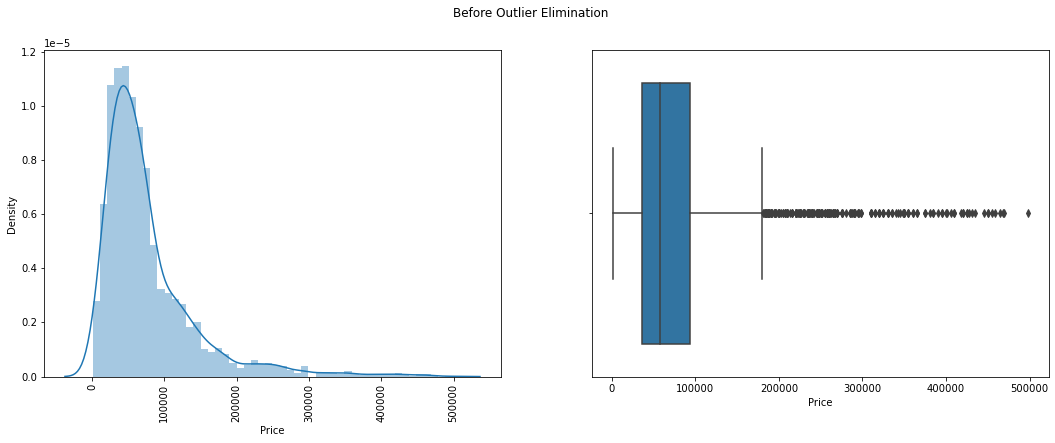

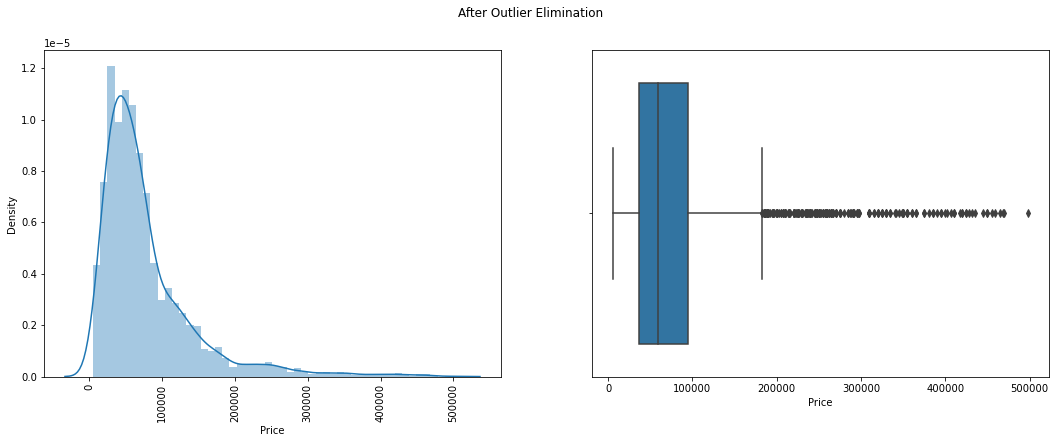

In [156]:
price_desc_before=df["Price"].describe()
price_normtest_before=normaltest(df["Price"])

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df["Price"])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(data=df,x="Price")
plt.suptitle("Before Outlier Elimination");

df=df[(df["Price"]>5000)]

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df["Price"])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(data=df,x="Price")
plt.suptitle("After Outlier Elimination");

**Summary**
- Seperti yang disinggung sebelumnya, model aka dilakukan pengercutan batasan model dimana pemodelan yang dilakukan hanya berlaku untuk target(price) range yaitu dari 5000 hingga 500000. 
- Kesalahan ini bisa saja terjadi karena kesalahan asumsi satuan dimana pada awalnya asumsi mengarah pada satuan USD dimana mobil dengan harga diatas 1000 masih masuk akal. Namun apabila satuan harga adalah SAR maka harga mobil dikisaran 1000 mungkin tidak masuk akal. Shingga di model ini akan diasumsikan bahwa satuan harga mobil dalam SAR

### 7.2 Preparation

**Define Feature**

In [157]:
X=df.drop(columns=["Price"])
y=df["Price"]

**Splitting**

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

### 7.3 Hyperparameter Tuning

**Hyperparameter Process**

In [159]:
hyperparam_space={
    "model__regressor__max_depth":[2,4,6,8,10],                     # max depth default: 6
    "model__regressor__learning_rate":list(np.arange(1, 10)/10),    # learning rate default: 0.3
    "scaler":[scaler_standard,scaler_minmax,scaler_robust]
}

pipe_model=Pipeline([
    ("transformer",transformer),
    ("scaler",scaler_standard),
    ("model",log_xgb)                  
])

gridsearch_xgb=GridSearchCV(
    estimator=pipe_model,       
    param_grid=hyperparam_space,           
    cv=crossval,                                  
    scoring=["neg_root_mean_squared_error","neg_mean_absolute_error","neg_mean_absolute_percentage_error"],
    refit="neg_mean_absolute_error",    
    n_jobs=-1                              
)

gridsearch_xgb.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Region',
              

**Hyperparameter Result**

In [160]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
df_xgb_score=pd.DataFrame(gridsearch_xgb.cv_results_).sort_values(by=["rank_test_neg_mean_absolute_error","rank_test_neg_root_mean_squared_error","rank_test_neg_mean_absolute_percentage_error"]).reset_index(drop=True)
df_xgb_score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__learning_rate,param_model__regressor__max_depth,param_scaler,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
0,1.310587,0.045683,0.028124,0.001596,0.1,10,MinMaxScaler(),"{'model__regressor__learning_rate': 0.1, 'model__regressor__max_depth': 10, 'scaler': MinMaxScaler()}",-25859.542348,-26582.680180,-24608.016792,-27142.454443,-21695.884686,-25177.715690,1936.322037,4,-14880.094560,-13253.974581,-13660.343345,-13890.718740,-12260.007397,-13589.027725,853.406421,1,-0.184612,-0.185237,-0.210897,-0.193475,-0.177805,-0.190405,0.011387,3
1,1.329676,0.053452,0.033111,0.009040,0.1,10,RobustScaler(),"{'model__regressor__learning_rate': 0.1, 'model__regressor__max_depth': 10, 'scaler': RobustScaler()}",-25863.552178,-26581.580918,-24608.785571,-27132.056652,-21763.478667,-25189.890797,1910.005897,5,-14897.136224,-13244.174340,-13659.939684,-13877.194822,-12283.521088,-13592.393231,851.167602,2,-0.184624,-0.184815,-0.210912,-0.192751,-0.177694,-0.190159,0.011419,1
2,1.309526,0.018321,0.028824,0.002049,0.1,10,StandardScaler(),"{'model__regressor__learning_rate': 0.1, 'model__regressor__max_depth': 10, 'scaler': StandardScaler()}",-25868.333275,-26624.569136,-24612.656429,-27139.185544,-21760.162392,-25200.981355,1919.060061,6,-14900.453378,-13264.345027,-13661.037026,-13878.897069,-12279.346853,-13596.815871,851.989012,3,-0.184737,-0.185127,-0.210857,-0.193042,-0.177704,-0.190293,0.011371,2
3,1.007267,0.035128,0.027327,0.002053,0.1,8,RobustScaler(),"{'model__regressor__learning_rate': 0.1, 'model__regressor__max_depth': 8, 'scaler': RobustScaler()}",-25865.367915,-28118.085836,-23902.662951,-27286.223540,-21621.717711,-25358.811591,2352.502923,10,-14862.406436,-13925.420187,-13570.441039,-13896.319064,-12305.644423,-13712.046230,824.721965,4,-0.187856,-0.191109,-0.207539,-0.191543,-0.180514,-0.191712,0.008845,4
4,1.018103,0.012099,0.027307,0.003675,0.1,8,StandardScaler(),"{'model__regressor__learning_rate': 0.1, 'model__regressor__max_depth': 8, 'scaler': StandardScaler()}",-25869.392046,-28145.413671,-23892.396872,-27296.872056,-21622.935568,-25365.402043,2361.730151,12,-14863.151352,-13943.668905,-13560.956320,-13918.079372,-12299.131299,-13716.997450,829.478862,5,-0.187847,-0.191349,-0.207388,-0.192289,-0.180403,-0.191855,0.008820,5


In [161]:
print("XGBoost Hypertuning")
print("Best_score:",gridsearch_xgb.best_score_)
print("Best_params:",gridsearch_xgb.best_params_)

XGBoost Hypertuning
Best_score: -13589.027724664595
Best_params: {'model__regressor__learning_rate': 0.1, 'model__regressor__max_depth': 10, 'scaler': MinMaxScaler()}


### 7.4 Model Implementation to Test Set

**Comparison Between Before Tuning and After Tuning**

In [162]:
score_rmse=[]
score_mae=[]
score_mape=[]

In [163]:
model_before_tuning=Pipeline([
    ("transformer",transformer),
    ("scaler",scaler_standard),
    ("model",log_xgb)
])

model_before_tuning.fit(X_train, y_train)
y_pred_xgb=model_before_tuning.predict(X_test)

score_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred_xgb)))
score_mae.append(mean_absolute_error(y_test,y_pred_xgb))
score_mape.append(mean_absolute_percentage_error(y_test,y_pred_xgb))

In [164]:
xgb_tuning=gridsearch_xgb.best_estimator_.fit(X_train,y_train)
y_pred_xgb_tuning=xgb_tuning.predict(X_test)

score_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred_xgb_tuning)))
score_mae.append(mean_absolute_error(y_test,y_pred_xgb_tuning))
score_mape.append(mean_absolute_percentage_error(y_test,y_pred_xgb_tuning))

In [165]:
df_comp_tuning=pd.DataFrame({"RMSE":score_rmse,"MAE":score_mae,"MAPE":score_mape},index=["XGB Before Tuning","XGB After Tuning"])
df_comp_tuning

,RMSE,MAE,MAPE
XGB Before Tuning,30466.701879,15675.187697,0.192426
XGB After Tuning,28803.147144,14815.875500,0.188909


**Comparison Between XGB model with best hyperparameter Predicted on Test Set and Train Set**

In [166]:
score_rmse=[]
score_mae=[]
score_mape=[]

In [167]:
# train 
score_rmse.append(df_xgb_score["mean_test_neg_root_mean_squared_error"][0]*-1)
score_mae.append(df_xgb_score["mean_test_neg_mean_absolute_error"][0]*-1)
score_mape.append(df_xgb_score["mean_test_neg_mean_absolute_percentage_error"][0]*-1)

In [168]:
# test
xgb_tuning=gridsearch_xgb.best_estimator_.fit(X_train,y_train)
y_pred_xgb_tuning=xgb_tuning.predict(X_test)

score_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred_xgb_tuning)))
score_mae.append(mean_absolute_error(y_test,y_pred_xgb_tuning))
score_mape.append(mean_absolute_percentage_error(y_test,y_pred_xgb_tuning))

In [169]:
df_comp_traintest=pd.DataFrame({"RMSE":score_rmse,"MAE":score_mae,"MAPE":score_mape},index=["XGB Train Score","XGB Test Score"])
df_comp_traintest

,RMSE,MAE,MAPE
XGB Train Score,25177.715690,13589.027725,0.190405
XGB Test Score,28803.147144,14815.875500,0.188909


**Comparison Between Predicted and Actual Price Predict on Test Set**

In [170]:
fig=px.scatter(x=y_test, y=y_pred_xgb_tuning,height=600,
                labels={
                     "y":"Predicted Price",
                     "x":"Actual Price",
                 },
                title="Actual Price vs Prediction Price"
)
fig.show()

**Summary**

- Secara keseluruhan, model mengalami peningkatan performa (RMSE, MAE dan MAPE berkurang) dengan dilakukannya hyperparameter tuning.
- Apabila melihat dari perbandingan nilai residual antara train set dan test set, maka bisa dikatakan model tidak terlalu overfit ataupun juga tidak terlalu underfit (Perbandingan Nilai RMSE, MAE, MAPE pada train set dan test set tidak jauh dan juga nilai error tidak tinggi)
- Apabila melihat dari plot perbandingan nilai residual yang aktual dengan yang prediksi, maka dapat disimpulkan model menunjukan hasil yang baik (hampir membentuk garis linear).
- Setelah dilakukan pengerucutan batasan model dan juga hyperparameter tuning (second attempt), maka rata-rata nilai MAPE turun secara drastis apabila dibandingkan hyperparameter tuning (first attempt).
    - Nilai MAPE test set sebelum pengerucutan batasan model: 79.6%
    - Nilai MAPE test set setalah pengerucutan batasan model: 18.89%

## 8 Feature Importance

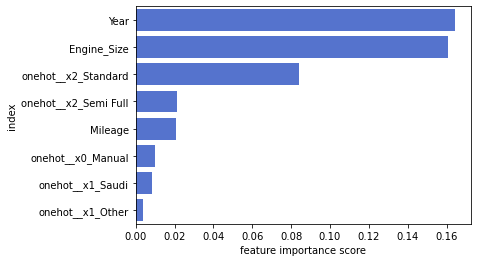

In [171]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].regressor_.feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
df_feature_imp=pd.DataFrame(feature_imp).reset_index().rename(columns={0:"feature importance score"})
df_feature_imp["indicator"]=df_feature_imp["index"].apply(lambda x: x.split("__")[0])
sns.barplot(data=df_feature_imp[df_feature_imp["indicator"]!="Binary"].sort_values(by="feature importance score",ascending=False),y="index",x="feature importance score",color="royalblue");

**Summary**

- Berdasarkan pemodelan yang sudah dilakukan dan barplot diatas, fitur "Year" dan "Engine_Size" menjadi fitur yang paling berpengaruh terhadap target "Price" atau dalam bisnis ini adalah harga mobil bekas. Hal ini juga didukung apabila melihat correlation score dari "Year" vs "Price" dan "Engine_Size" vs "Price" dengan masing-masing score yaitu 0.42 dan 0.38 (Nilai tertinggi)
- Namun pada grafik diatas fitur-fitur yang sudah diencode dengan binary encoder tidak dimasukan (fitur "Type", "Make", "Region"). Hal ini dikarenakan fitur yang diencode secara binary akan sulit dintepretasi

## 9 Conclusion and Recommendation

### 9.1 Conclusion

Setelah dilakukan pemodelan untuk dataset Saudi Arabia Secara keseluruhan maka dapat disimpulkan bahwa:
- Model yang paling baik untuk diimplementasi pada Dataset ini adalah XGBoost ("model__regressor__learning_rate": 0.1, "model__regressor__max_depth": 10, "scaler": MinMaxScaler()) dengan limitasi model (range harga SAR 5000 - SAR 500000)
- Dua fitur yang sangat berpengaruh terhadap harga mobil adalah "Year" dan "Engine_Size"
- Nilai MAPE pada test set sebesar 18.89% dapat menyimpulkan bahwa model dapat dikategorikan good forcasting (lewis, 1982)
- Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Namun dikarenakan umunya kasus yang tragetnya merupakan harga properti (dalam kasus ini mobil bekas) menggunakan evaluasi metrik MAE, maka kita coba simpulkan model menggunakan metrik ini. Hasil evalusi MAE pada test set setelah dilakukan hyperparamter tuning (second attempt) yaitu SAR 15616. Dari hasil tersebut dapat disimpulkan bahwa apabila ada data baru (maksimal harga SAR 500000 dan minimal harga SAR 5000) yang ingin diprediksi dengan menggunakan model ini maka perkiraan harganya setidaknya akan meleset kurang lebih sebesar SAR 15616. Namun untuk disini kita dapat memakai evalusi metrik RMSE untuk berjaga-jaga (asumsi yang lebih aman), karena RMSE "menghukum" model lebih besar dibanding MAE. Sehingga umumnya nilai RMSE lebih besar dari MAE. Apabila dilihat dari nilai RMSE, maka dapat disimpulkan bahwa apabila ada data baru (maksimal harga SAR 500000 dan minimal harga SAR 5000) yang ingin diprediksi dengan menggunakan model ini maka perkiraan harganya setidaknya akan meleset kurang lebih sebesar SAR 30304. Namun bukan berarti nilai errornya selalu dirange RMSE ataupun MAE. Bisa saja nilai prediksinya meleset jauh diluar nilai MAE atau bahkan RMSE karena bias yang dihasilkan model cukup tinggi khususnya terlihat pada harga mobil yang diatas SAR 150000.

Source: *Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

### 9.2 Recommendation

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:
- Penambahan fitur yang lebih korelatif dengan target ("Price"). Apabila dilihat dari correlation test, fitur yang memiliki korelasi paling tinggi adalah fitur "Year" dengan score yang bisa dibilang moderate correlation (0.42) / tidak terlalu tinggi.  
- Jika memungkinkan dilakukan penambahan data khususnya pada fitur "Type" dan "Make" pada mobil-mobil bekas yang memiliki jumlah sedikit.
- Peningkatan performa model juga bisa dilakukan dengan feature engineering yang lain. Sebagai contoh:
    - Polynomial dengan ordo yang tidak terlalu tinggi. Polynomial yang tinggi beresiko membuat model menjadi overfitting. Perlu diingat juga pengimplementasian polynomial kepada feature membuat pengintepretasian pada feature importance menjadi sedikit sulit
    - Binning terhadap salah satu fitur. Misalnya fitur region bisa dilakukan pelompokan(binning) berdasarkan provinsi di Saudi Arabia
- Penambahan parameter pada saat melakukan tuning. Misalnya gamma, n_estimator, etc. Namun penambahan ini akan memakan banyak waktu komputasi
- Penggunaan model lain selain yang sudah dilakukan ataupun menggunakan pendekatan ensemble model lainnya (voting, etc).

## 10 Deployment

In [176]:
# Load Dataset
df = pd.read_csv("data_saudi_used_cars.csv")

# Drop baris yang termasuk negotiable dan kolom negotiable
df=df[df["Negotiable"]!=True]
df.drop(columns="Negotiable",inplace=True)

# Drop Unique item yang jumlahnya kurang dari 2 
for i in list(df["Type"].value_counts()[df["Type"].value_counts()<2].index):
    df=df[df["Type"]!=i]
for i in list(df["Make"].value_counts()[df["Make"].value_counts()<2].index):
    df=df[df["Make"]!=i]
for i in list(df["Region"].value_counts()[df["Region"].value_counts()<2].index):
    df=df[df["Region"]!=i]

# Mengubah "Unknown" pada fitur "Origin" menjadi Modusnya
df["Origin"]=np.where(df["Origin"]=="Unknown",df["Origin"].mode(),df["Origin"])

# Outlier Elimination
df=df[df["Mileage"]<1000000]
df=df[(df["Price"]<500000)&(df["Price"]>5000)]

# Putting features into dependent and independent variables
X=df.drop(columns=["Price"])
y=df["Price"]

# Transformer
transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(drop='first'),["Gear_Type","Origin","Options"]),
    ('Binary', ce.BinaryEncoder(), ["Type","Region","Make"])
],remainder='passthrough')

# model
xgb=XGBRegressor(random_state=42,learning_rate=0.1,max_depth= 10)
log_xgb=TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# pipeline
log_xgb_final=Pipeline([
    ("transformer",transformer),
    ("scaler",scaler_minmax),
    ("model",log_xgb)                  
])

log_xgb_final.fit(X,y)
#pickle.dump(log_xgb_final, open("saudi_used_car.sav", "wb"))

14815.875500354137